### Проверка гипотез

1. Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

2. Постройте график распределения числа показов (impressions) для каждой рекламы, прологарифмировав значения.

3. Создайте новую колонку с CTR (Click-Through Rate). Посмотрите на описательные статистики и распределение.

4. Проанализируйте CTR с разбивкой по рекламной кампании.

5. Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости.

6. Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления.

7. Посчитайте конверсию из клика в покупку.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import json 
import os

from kaggle.api.kaggle_api_extended import KaggleApi

In [18]:
os.chdir("C:/api")
data = {"username":"username","key":"tockenvalue"}
with open('kaggle.json', 'w') as outfile:
    json.dump(data, outfile)

api = KaggleApi('kaggle.json')
api.authenticate()

url = "loveall/clicks-conversion-tracking"

api.dataset_download_files(url, path=r'C:\Users\User\notebooks\analytic_karpov\статистика\datasets',
                           unzip=True)                  

Dataset URL: https://www.kaggle.com/datasets/loveall/clicks-conversion-tracking


In [21]:
url = r'C:\Users\User\notebooks\analytic_karpov\статистика\datasets\KAG_conversion_data.csv'

In [22]:
data_kag = pd.read_csv(url)
data_kag.head(3)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0


Описание данных
 
* ad_id – идентификатор объявления (рекламы)
 
* xyz_campaign_id – идентификатор рекламной кампании в базе компании X
 
* fb_campaign_id – идентификатор кампании в Facebook
 
* age – возрастная группа, которой показывалась реклама
 
* gender – пол тех, кому показывалась реклама
 
* interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес)
 
* impressions – число показов
 
* clicks – число кликов
 
* spent – сумма, которую компания потратила на показ объявления
 
* total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
 
* approved_conversion – количество людей, которые купили продукт после просмотра рекламы

1. Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.


In [24]:
data_kag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [25]:
data_kag.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [30]:
data_kag.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [31]:
data_kag.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

Сколько уникальных рекламных кампаний было проведено?



In [38]:
print(f"Уникальные значения: {data_kag.xyz_campaign_id.unique()}"
      f"\nКоличество значений: {data_kag.xyz_campaign_id.nunique()}")

Уникальные значения: [ 916  936 1178]
Количество значений: 3



2. Постройте график распределения числа показов (impressions) для каждой рекламы, прологарифмировав значения.

In [41]:
lg_data = np.log(data_kag.Impressions)
lg_data.head(3)

0    8.902456
1    9.790375
2    6.541030
Name: Impressions, dtype: float64

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


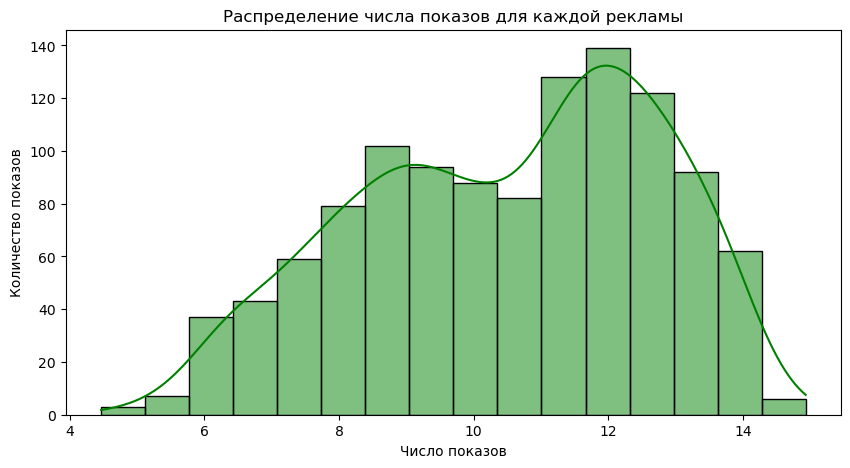

In [58]:
plt.figure(figsize=(10,5))

sns.histplot(lg_data, kde=True, color='green')

plt.xlabel('Число показов')
plt.ylabel('Количество показов')
plt.title('Распределение числа показов для каждой рекламы')

plt.show()

Данное распределение является биномидальным => полученные данные не распределены нормально

3. Создайте новую колонку с CTR (Click-Through Rate). Посмотрите на описательные статистики и распределение.

CTR = clicks / impressions

Создайте новую колонку, затем посмотрите на описательные статистики. В качестве ответа укажите ad_id объявления с наибольшим CTR.

In [72]:
data_kag['CTR'] = data_kag.Clicks / data_kag.Impressions
data_kag.head(3)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000


In [75]:
data_kag.CTR.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: CTR, dtype: float64

In [74]:
data_kag.CTR.idxmax()

150

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


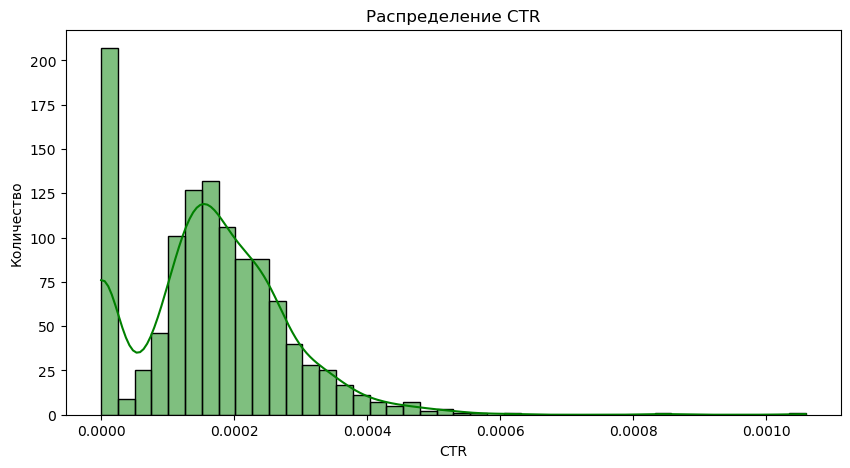

In [79]:
plt.figure(figsize=(10, 5))

sns.histplot(data_kag.CTR, kde=True, color='green')

plt.xlabel('CTR')
plt.ylabel('Количество')
plt.title('Распределение CTR')

plt.show()

Распределение является биноминальным => данные также не распределены нормально

4. Проанализируйте CTR с разбивкой по рекламной кампании.


Text(0.5, 1.0, 'Средний CTR по рекламным кампаниям')

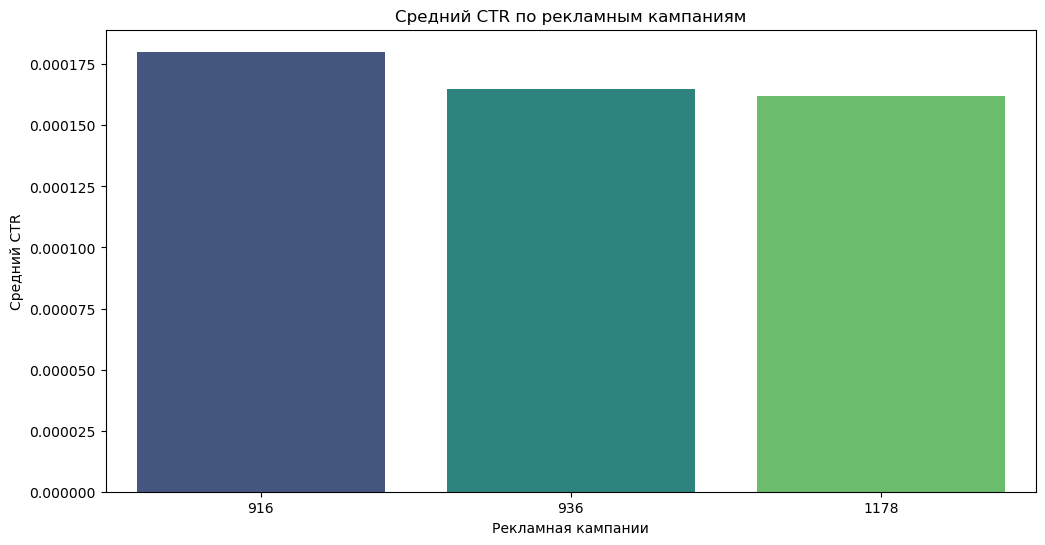

In [92]:
campaign_ctr = data_kag.groupby('xyz_campaign_id')['CTR'].mean().reset_index()

plt.figure(figsize=(12, 6))

sns.barplot(data=campaign_ctr, x='xyz_campaign_id', y='CTR', palette='viridis')

plt.xlabel('Рекламная кампании')
plt.ylabel('Средний CTR')
plt.title('Средний CTR по рекламным кампаниям')

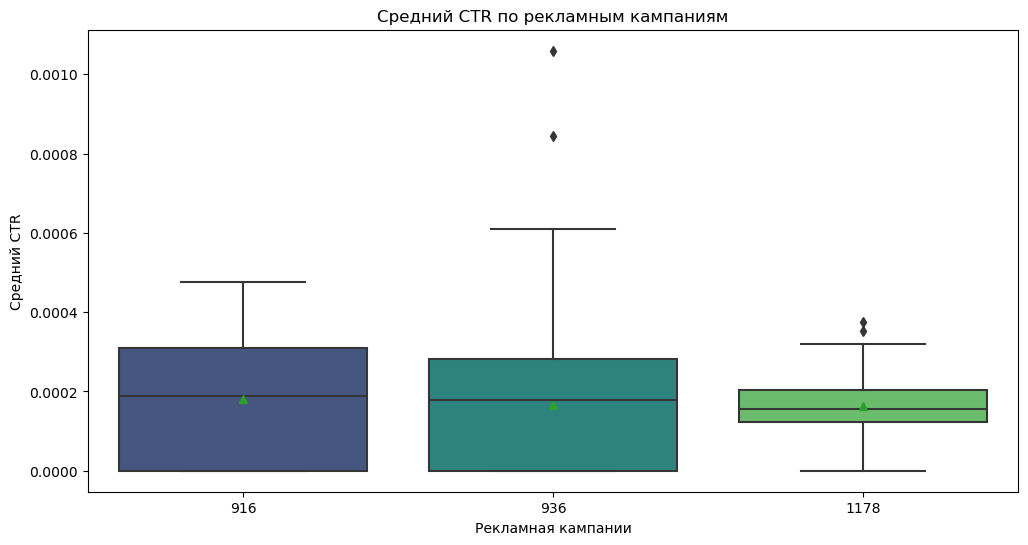

In [93]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_kag, x='xyz_campaign_id', y='CTR', palette='viridis', showmeans=True)

plt.xlabel('Рекламная кампании')
plt.ylabel('Средний CTR')
plt.title('Средний CTR по рекламным кампаниям')

plt.show()

* Медианное значение самое большое у компании 916, а меньшее - у компании 1178
* Межквартильный размах самый большой у компании 936
* Выбросы (сильно дистанцированные значения) у компаний 936 и 1178

Какой график распределения у компании 916?

In [100]:
CTR_916_data = data_kag[data_kag.xyz_campaign_id == 916]
CTR_916_data.head(3)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


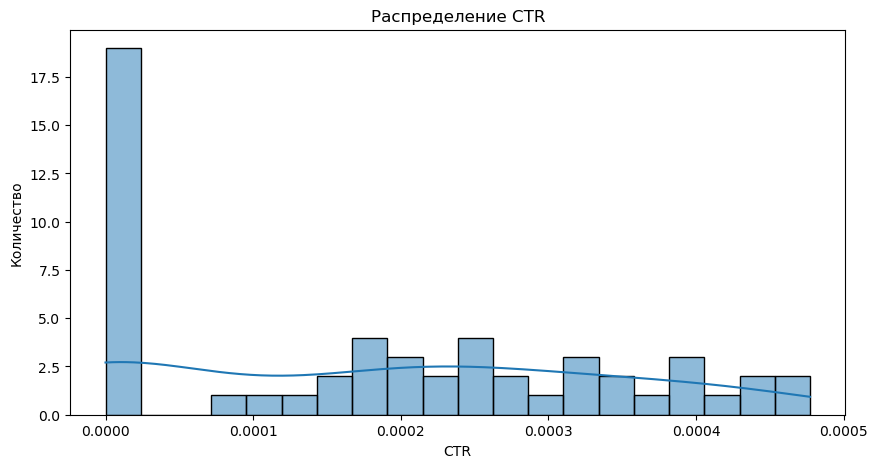

In [106]:
plt.figure(figsize=(10, 5))

sns.histplot(CTR_916_data.CTR, kde=True, bins=20)

plt.xlabel('CTR')
plt.ylabel('Количество')
plt.title('Распределение CTR')

plt.show()

5. Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости.


Меры центральной изменчивости:
* медиана
* мода
* среднее

Меры изменчивости:
* размах
* межквартильный размах
* дисперсия
* стандартное отклонение

CPC = spent / clicks

Выведите описательные статистики для новой переменной, посмотрите на форму распределения. В ответе укажите межквартильный размах, округленный до двух знаков после точки.

In [117]:
data_kag['CPC'] = data_kag['Spent'] / data_kag['Clicks']
data_kag.head(3)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN


In [119]:
data_kag['CPC'] = data_kag['CPC'].fillna(value = 0.0)
data_kag.head(3)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,0.00


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


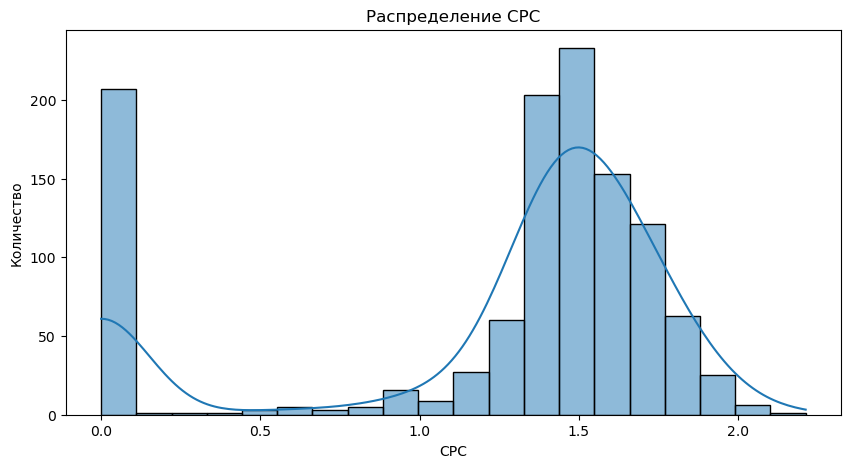

In [136]:
plt.figure(figsize=(10, 5))

sns.histplot(data_kag.CPC, kde=True, bins=20)

plt.xlabel('CPC')
plt.ylabel('Количество')
plt.title('Распределение CPC')

plt.show()

Распределение является биноминальным => не распределены нормально

In [135]:
print(f"Среднее: {data_kag.CPC.mean()}\n"
      f"Медиана: {data_kag.CPC.median()}\n"
      f"Мода: {data_kag.CPC.mode()}"
      )

Среднее: 1.2278120823600052
Медиана: 1.4500000475
Мода: 0    0.0
Name: CPC, dtype: float64


In [138]:
Q1 = np.quantile(data_kag.CPC, 0.25)
Q3 = np.quantile(data_kag.CPC, 0.75)

print(f"Размах: {data_kag.CPC.max() - data_kag.CPC.min()}\n"
      f"1-ый квантиль: {Q1}\n"
      f"3-ый квантиль: {Q3}\n"
      f"Межквартильный размах: {Q3 - Q1}\n"
      f"Дисперсия: {data_kag.CPC.var()}\n"
      f"Стандартное отклонение: {data_kag.CPC.std()}\n"
    )

Размах: 2.21199994
1-ый квантиль: 1.234500002825
3-ый квантиль: 1.599999964
Межквартильный размах: 0.36549996117500005
Дисперсия: 0.3780886011988369
Стандартное отклонение: 0.6148890966660874



Дисперсия довольна мала, что говорит о умеренном отклонении/разбросе данных от средней величины.

6. Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления.


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


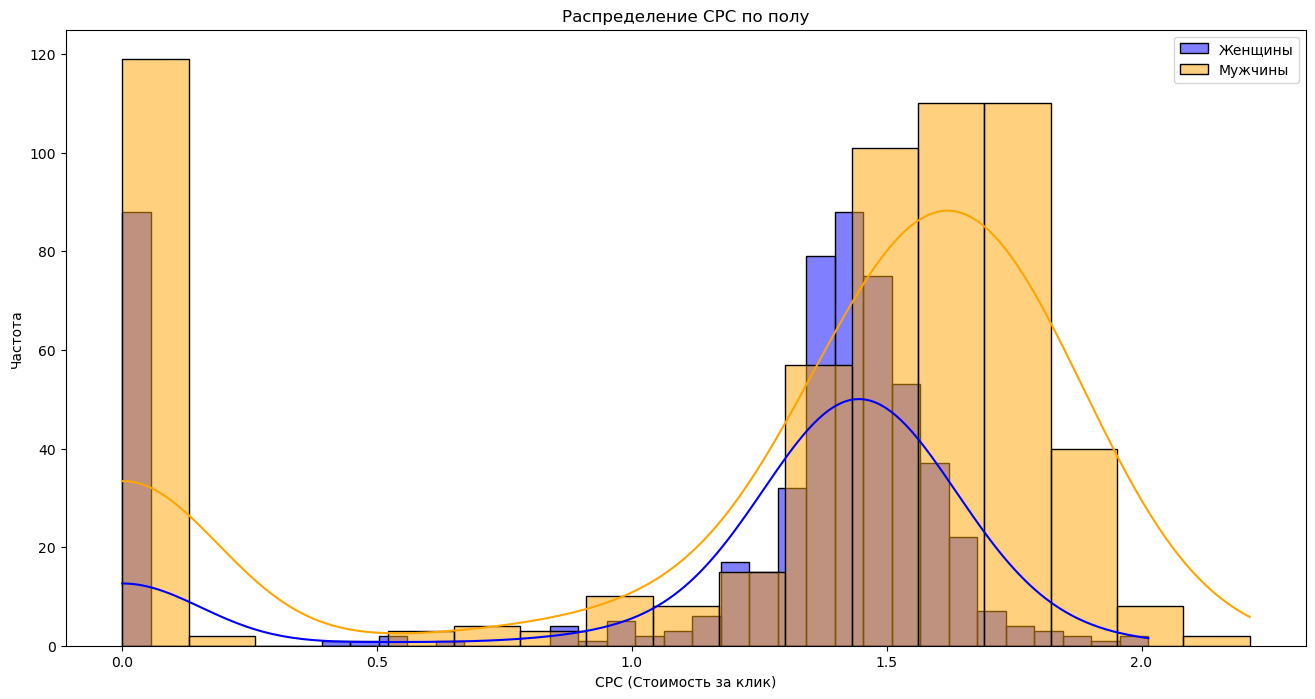

In [159]:
plt.figure(figsize=(16, 8))

sns.histplot(data_kag[data_kag['gender'] == 'F']['CPC'].dropna(), kde=True, label='Женщины', color='blue')
sns.histplot(data_kag[data_kag['gender'] == 'M']['CPC'].dropna(), kde=True, label='Мужчины', color='orange')

plt.xlabel('CPC (Стоимость за клик)')
plt.ylabel('Частота')
plt.title('Распределение CPC по полу')
plt.legend()

plt.show()


7. Посчитайте конверсию из клика в покупку.

Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа

In [ ]:
cr = data_kag.groupby('ad_id', as_index=False).agg({'Clicks' : 'sum', 'Approved_Conversion' : 'sum'})

In [166]:
data_kag['CR'] = cr.Approved_Conversion / cr.Clicks * 100
data_kag['CR'] = data_kag['CR'].fillna(0.0)
data_kag.head(3)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43,100.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,0.00,0.0


Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков.

In [172]:
print(f"Конверсия для объявления 1121814: \
      {np.round(data_kag[data_kag.ad_id == 1121814].CR.values[0], 2)}")

Конверсия для объявления 1121814:       3.09


Процент совершивших целевое действие среди пользователей, увидивших объявление под номером 1121814 - 3.09 